### I collected two datasets on U.S. agricultural exports and imports, merged them into one, and performed basic descriptive statistics and visualization.


Databases:
https://www.ers.usda.gov/data-products/foreign-agricultural-trade-of-the-united-states-fatus/fiscal-year

Foreign Agricultural Trade of the United States (FATUS) - Fiscal year:

Value of U.S. agricultural exports by level of processing for bulk and high-value products, by fiscal year;

Value of U.S. agricultural imports by level of processing for bulk and high-value products, by fiscal year


### 1.1. Download



In [9]:
from xml.dom.minidom import NamedNodeMap

import requests
import pandas as pd
import io
import matplotlib.pyplot as plt

FATUS_Import_url = "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/50441/fyHVPsumimp.xlsx?v=67347"
#Value of U.S. agricultural imports by level of processing for bulk and high-value products, by fiscal year

response = requests.get(FATUS_Import_url)
FATUS_Import_data = pd.read_excel(io.BytesIO(response.content))
FATUS_Import_data.head(10)


,"Value of U.S. agricultural imports by level of processing for bulk and high-value products, by fiscal year",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,High-value products1,NaN,NaN
1,NaN,Total imports,Bulk1,NaN,Total,Raw,Semi-processed,Processed
2,NaN,U.S. dollars,U.S. dollars,NaN,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars
3,1990,23816495881,1026222625,NaN,22790273256,5123467762,2570999845,15095805649
4,1991,23818999687,1111252746,NaN,22707746941,5333422128,2564020721,14810304092
5,1992,25843622061,1840130757,NaN,24003491304,5511538132,2761471275,15730481897
6,1993,25919551202,1608199844,NaN,24311351358,6243521526,2738881072,15328948760
7,1994,27907248012,1979310156,NaN,25927937856,6231614436,3021806510,16674516910
8,1995,30479531390,1449525891,NaN,29030005499,7154819241,3535933336,18339252922
9,1996,33420700689,1964181075,NaN,31456519614,7721996172,4287147901,19447375541


In [10]:
FATUS_Export_url = "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/50441/fyhvpsumexp.xlsx?v=77960"
#Value of U.S. agricultural exports by level of processing for bulk and high-value products, by fiscal year

response = requests.get(FATUS_Export_url)
FATUS_Export_data = pd.read_excel(io.BytesIO(response.content))
FATUS_Export_data.head(10)


,"Value of U.S. agricultural exports by level of processing for bulk and high-value products, by fiscal year",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,High-value products1,NaN,NaN
1,NaN,Total exports,Bulk1,NaN,Total,Raw,Semi-processed,Processed
2,NaN,U.S. dollars,U.S. dollars,NaN,U.S. dollars,U.S. dollars,U.S. dollars,U.S. dollars
3,1990,45347577812,21211260303,NaN,24136317509,4579502817,6694329991,12862484701
4,1991,43458610595,17147459034,NaN,26311151561,5327042721,6387305153,14596803687
5,1992,47156292395,18987461701,NaN,28168830694,5765639170,7054211418,15348980106
6,1993,47934159931,18542250197,NaN,29391909734,5613939194,6924848000,16853122540
7,1994,49495115205,17370452054,NaN,32124663151,6104748959,7270896710,18749017482
8,1995,60958249932,23805060113,NaN,37153189819,6403602288,9157514857,21592072674
9,1996,65873415365,28200378140,NaN,37673037225,6631090052,8522373992,22519573181


### 1.2 Manipulate Data






In [34]:


df_Import = FATUS_Import_data.iloc[3:, 0:5]
df_Import.columns = ['USA_Year', 'Import(dollars)', 'Bulk1(import_dollars)',"NaN",'High-value products(import_dollars)']
df_Import = df_Import.reset_index(drop=True)
df_Import.index = df_Import.index + 1
df_Import = df_Import.drop(columns=df_Import.columns[3])
df_Import.head(10)

,USA_Year,Import(dollars),Bulk1(import_dollars),High-value products(import_dollars)
1,1990,23816495881,1026222625,22790273256
2,1991,23818999687,1111252746,22707746941
3,1992,25843622061,1840130757,24003491304
4,1993,25919551202,1608199844,24311351358
5,1994,27907248012,1979310156,25927937856
6,1995,30479531390,1449525891,29030005499
7,1996,33420700689,1964181075,31456519614
8,1997,37191551707,2494100767,34697450940
9,1998,38832490737,1936348286,36896142451
10,1999,39740959959,1871186211,37869773748


In [35]:
df_Export = FATUS_Export_data.iloc[3:, 0:5]
df_Export.columns = ['USA_Year', 'Export(dollars)', 'Bulk1(export_dollars)',"NaN",'High-value products(export_dollars)']
df_Export = df_Export.reset_index(drop=True)
df_Export.index = df_Export.index + 1
df_Export = df_Export.drop(columns=df_Export.columns[3])

df_Export.head(10)

,USA_Year,Export(dollars),Bulk1(export_dollars),High-value products(export_dollars)
1,1990,45347577812,21211260303,24136317509
2,1991,43458610595,17147459034,26311151561
3,1992,47156292395,18987461701,28168830694
4,1993,47934159931,18542250197,29391909734
5,1994,49495115205,17370452054,32124663151
6,1995,60958249932,23805060113,37153189819
7,1996,65873415365,28200378140,37673037225
8,1997,63068094342,23684272305,39383822037
9,1998,59400921997,20309111626,39091810371
10,1999,53754556403,18014555177,35740001226


### 1.3 Merge Data






In [37]:
df_FATUS_merge = pd.merge(
    df_Import,
    df_Export,
    on='USA_Year',
    how='outer'
)
df_FATUS_merge.index = range(1, len(df_FATUS_merge) + 1)
df_FATUS_merge.head(10)


,USA_Year,Import(dollars),Bulk1(import_dollars),High-value products(import_dollars),Export(dollars),Bulk1(export_dollars),High-value products(export_dollars)
1,1990,23816495881,1026222625,22790273256,45347577812,21211260303,24136317509
2,1991,23818999687,1111252746,22707746941,43458610595,17147459034,26311151561
3,1992,25843622061,1840130757,24003491304,47156292395,18987461701,28168830694
4,1993,25919551202,1608199844,24311351358,47934159931,18542250197,29391909734
5,1994,27907248012,1979310156,25927937856,49495115205,17370452054,32124663151
6,1995,30479531390,1449525891,29030005499,60958249932,23805060113,37153189819
7,1996,33420700689,1964181075,31456519614,65873415365,28200378140,37673037225
8,1997,37191551707,2494100767,34697450940,63068094342,23684272305,39383822037
9,1998,38832490737,1936348286,36896142451,59400921997,20309111626,39091810371
10,1999,39740959959,1871186211,37869773748,53754556403,18014555177,35740001226


In [38]:
df_FATUS_merge.to_csv("FATUS_merge.csv", encoding="utf-8-sig")

### 2.4 Descriptive stats

In [43]:
df_FATUS_merge.describe()

,USA_Year,Import(dollars),Bulk1(import_dollars),High-value products(import_dollars),Export(dollars),Bulk1(export_dollars),High-value products(export_dollars)
count,45,35,35,35,35,35,35
unique,45,35,35,35,35,35,35
top,1990,23816495881,1026222625,22790273256,45347577812,21211260303,24136317509
freq,1,1,1,1,1,1,1


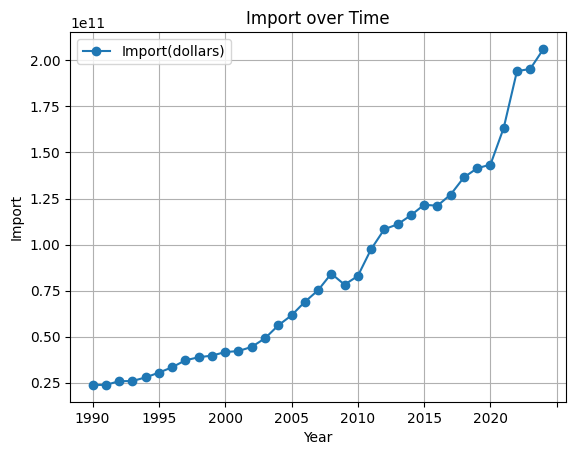

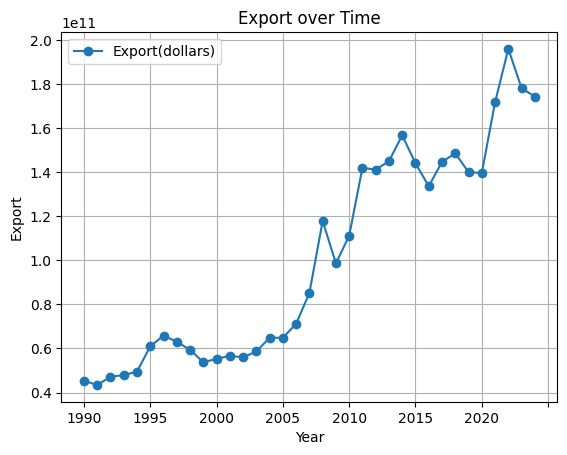

In [44]:
df_FATUS_merge.plot(x='USA_Year', y='Import(dollars)', kind='line', marker='o', title='Import over Time')
plt.xlabel('Year')
plt.ylabel('Import')
plt.grid(True)
plt.show()

df_FATUS_merge.plot(x='USA_Year', y='Export(dollars)', kind='line', marker='o', title='Export over Time')
plt.xlabel('Year')
plt.ylabel('Export')
plt.grid(True)
plt.show()